### Classification:-

The Classification algorithm is a Supervised Learning technique that is used to identify the category of new observations on the basis of training data. In Classification, a program learns from the given dataset or observations and then classifies new observation into a number of classes or groups. Such as, "Yes or No", "0 or 1", "Spam or Not Spam", "cat or dog", etc. Classes can be called as targets/labels or categories.

### MNIST:-

Here, we are using MNIST(modified national insitute of standards and technology) which is is a large database of handwritten digits that is commonly used for training various image processing systems.It was created by "re-mixing" the samples from NIST's original datasets.The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students.

In [73]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Loading dataset
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
# To get the description of the mnist data.
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

• A "data" key containing an array with one row per instance and one column per
feature.

• A "target" key containing an array with the labels.

In [4]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


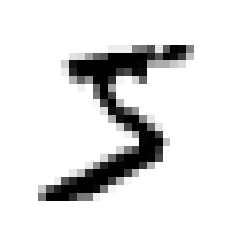

In [5]:
import numpy
some_digit = X.iloc[0]
some_digit_image=numpy.array([some_digit]).reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [6]:
some_digit

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

In [7]:
print(y[0])

5


In [8]:
type(y[0])

str

In [9]:
# As, we can see, the dtype of the data in the target column is str, let's convert it into integer.
y=y.astype('int64')

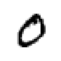

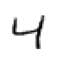

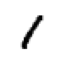

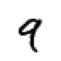

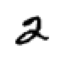

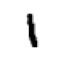

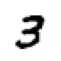

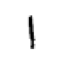

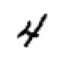

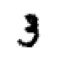

In [10]:
for i in range(1,11):
    fig = plt.figure(figsize=(5, 5))
    some_digit = X[i:i+1]
    some_digit_image =numpy.array([some_digit]).reshape(28, 28)
    fig.add_subplot(5,2,i)
    plt.imshow(some_digit_image, cmap=mpl.cm.binary)
    plt.axis("off")
    plt.show()


In [11]:
'''You should always create a test set and set it aside before inspecting the data
closely. The MNIST dataset is actually already split into a training set (the first 60,000
images) and a test set (the last 10,000 images)'''

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


Let's train a binary classifier, suppose, 3-detector i.e. whether a number is 3 or not. So, we will seperate the train and test cases for number 3 detector.

In [12]:
y_train_3 = (y_train == 3) # True for all 3s, False for all other digits.
y_test_3 = (y_test == 3)


In [13]:
''' Here, we are using SGDClassifier which means stochastic gradient descent classifer. Gradient descent is type of
an algorithm which is used to fit the model parameters in such a way that they are optimal and will result in less 
error as much as it can and stochastic is type of graident descent which helps us to feed one training example at a
time instead of using whole dataset which can also help in the online learning.'''
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_3)

SGDClassifier(random_state=42)

In [14]:
sgd_clf.predict(some_digit)
# It returns true which means the figure is 3 and as we can see the last figure we have
# plotted is also 3, which means, it is correct

array([ True])

### Evaluating the model

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# Clone is used to create a new unfitted estimator with same parameters. Clone does a deep 
# copy of the model in an estimator without actually copying attached data. It returns
# a new estimator with the same parameters that has not been fitted on any data.


In [16]:
skfolds=StratifiedKFold(n_splits=3)
for train_index, test_index in skfolds.split(X_train, y_train_3):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_3.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_3.iloc[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9496
0.9624
0.96275


In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_3, cv=3, scoring="accuracy")

array([0.9496 , 0.9624 , 0.96275])

In [18]:
import numpy as np 
np.zeros((2,1) ,dtype=bool)

array([[False],
       [False]])

In [19]:
# let’s look at a very dumb classifier that just classifies every single image in
# the “not-3” class:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [20]:
# It means 89% percent of the images are not-3 and 11% percent are images are 3, so even
# if it will always predict not-3 there will be 89% of accuracy.
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_3, cv=3, scoring="accuracy")

array([0.8962 , 0.89975, 0.8975 ])

Accuracy metric is not a good option when we have unbalanced dataset. So, we will use confusion matrix, it is more good option where output can be two or more classes. It is a table with the combination of the predicted and actual value.

In [21]:
# Instead of using cross_val-score, we are using cross_val_predict, which will return only
# predicted values.
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3)


In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_3,y_train_pred)

array([[53477,   392],
       [ 2113,  4018]], dtype=int64)

In [23]:
confusion_matrix(y_train_pred,y_train_3)

array([[53477,  2113],
       [  392,  4018]], dtype=int64)

In [24]:
y_train_perfect_predictions = y_train_3 # pretend we reached perfection
confusion_matrix(y_train_3, y_train_perfect_predictions)

array([[53869,     0],
       [    0,  6131]], dtype=int64)

In [25]:
'''Precision score specifies how much of instances are actually true out of total 
predicted true. Recall score specifies how much of the positive instances are correctly
predicted by the model.'''

# Precision=TP/TP+FP
# Recall=TP/TP+FN
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_3,y_train_pred)

0.9111111111111111

In [26]:
recall_score(y_train_3,y_train_pred)

0.655358016636764

In [28]:
# We can also combine the both precision and recall using f1 score.

''' The F1 score is the harmonic mean of precision and recall, whereas the regular mean
treats all values equally, the harmonic mean gives much more weight to low values.
As a result, the classifier will only get a high F1 score if both recall and precision are
high.'''

from sklearn.metrics import f1_score
f1_score(y_train_3,y_train_pred)

0.7623565126648326

It is not always neccesary that you want same precision and recall. Sometimes, you want high precision and sometimes recall depending on the problem we are going to solve. When precision increases recall decreases and vice-versa. This is call precision/recall tradeoff.
    
To understand this tradeoff, let’s look at how the SGDClassifier makes its classification decisions. For each instance, it computes a score based on a decision function, 
and if that score is greater than a threshold, it assigns the instance to the positive
class, or else it assigns it to the negative class.

In [30]:
# decision_function() returns the score for an instance. Now, we can compare it with our
# own threshold to compute the prediction.
# As the threshold increases, the recall decreases.
y_scores=sgd_clf.decision_function(some_digit)
y_scores

array([1378.05599034])

In [32]:
threshold=0
# SGDClassifier uses  default threshold value 0, so it will return the results as same as predict.
y_score_pred=(y_scores>threshold)
y_score_pred

array([ True])

In [33]:
# Setting the threshold to some new value.
threshold=8000
y_score_pred=(y_scores>threshold)
y_score_pred

array([False])

In [34]:
'''So, how to decide the perfect value for the threshold. For this you will first need to get the
scores of all instances in the training set using the cross_val_predict() function
again, but this time specifying that you want it to return decision scores instead of
predictions:'''

y_scores=cross_val_predict(sgd_clf,X_train,y_train_3,cv=3,method='decision_function')

In [119]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds= precision_recall_curve(y_train_3,y_scores)

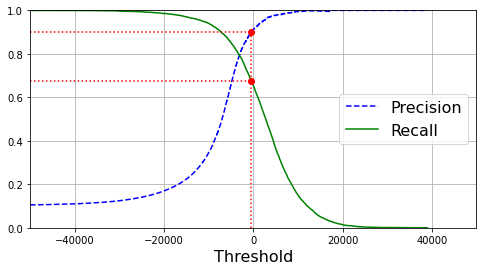

In [125]:
import matplotlib.pyplot as plt
def plot_precision_recall_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds,precisions[:-1],'b--',label='Precision')
    plt.plot(thresholds,recalls[:-1],'g',label='Recall')
    plt.xlabel('Threshold',fontsize=16)
    plt.legend(loc="center right",fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])  

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  
plot_precision_recall_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                               
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                                                                     
plt.show()

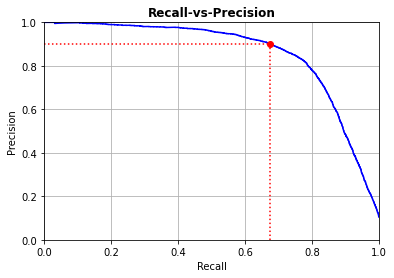

In [127]:
def plot_precision_recall(precisions,recalls):
    plt.plot(recalls,precisions,'b-')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.axis([0, 1, 0, 1])
    plt.title('Recall-vs-Precision', fontweight="bold")
plot_precision_recall(precisions,recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

In [64]:
# As, we can see after 80% percent of recall, the precision immediately
# falls down. If you want to keep the high precision, you have to keep
# the threshold high.
# Now, suppose you want 90% of precision and you want to find the lowest 
# value of threshold that gives 90% precision. 

threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
y_scores_pred=(y_scores>=threshold_90_precision)

In [65]:
# So, it will give 90% of the precision.
precision_score(y_train_3,y_scores_pred)

0.9000870700914236

In [66]:
# Let's check out the corresponding recall.
recall_score(y_train_3,y_scores_pred)

0.6744413635622247

## ROC Curve:-

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate ( recall) against the false positive rate. The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true negative rate,which is the ratio of negative instances that are correctly classified as negative. The TNR is also called specificity. Hence the ROC curve plots sensitivity (recall)versus
1–specificity.


In [69]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_3, y_scores)

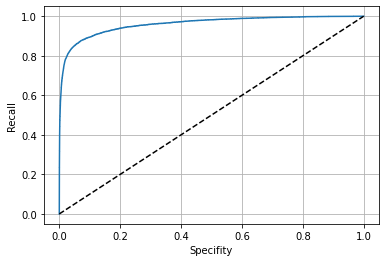

In [71]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.xlabel('Specifity')
    plt.ylabel('Recall')
    plt.grid()
plot_roc_curve(fpr,tpr)
plt.show()    

In [72]:
'''One way to compare classifiers is to measure the area under the curve (AUC).
A perfect classifier will have a ROC AUC = 1, whereas a purely random 
classifier will have a ROC AUC equal to 0.5. Scikit-Learn provides a 
function to compute the ROC AUC'''

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_3,y_scores)

0.9599243001892759

In [75]:
# Let's train the RandomForestClassifier and comparing the roc_curve with the SGDClassifier. 
forest_clf=RandomForestClassifier(random_state=42)
y_forest_proba=cross_val_predict(forest_clf,X_train,y_train_3,cv=3,method='predict_proba')

#The predict_proba() method returns an array containing a row per instance 
#and a column per class, each containing the probability that the given 
# instance belongs to the given class (e.g., 70% chance that the image
# represents a 3)


In [76]:
# As predict_proba returns us the probability, but we need scores for the 
# ROC Curve, so, we fetch only the results of the positive class.
y_forest_scores=y_forest_proba[:,1]
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train_3,y_forest_scores)

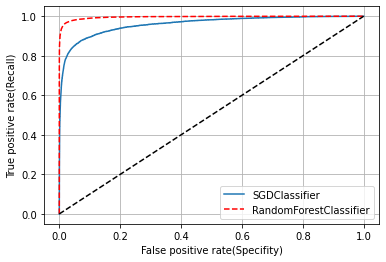

In [80]:
# Let's plot
def plot_roc_curve_compare(fpr,tpr,fpr_forest,tpr_forest):
    plt.plot(fpr,tpr,label='SGDClassifier')
    plt.plot(fpr_forest,tpr_forest,'r--',label='RandomForestClassifier')
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.legend(loc='lower right')
    plt.xlabel('False positive rate(Specifity)')
    plt.ylabel('True positive rate(Recall)')
    plt.grid()
plot_roc_curve_compare(fpr,tpr,fpr_forest,tpr_forest)
plt.show()   

In [89]:
roc_auc_score(y_train_3,y_forest_scores)

0.995864544068936

## Mutli-classification:- 
**There are various strategies that you can use to perform multiclass classification using multiple binary classifiers.**

1. One way to create a system that can classify the digit images into 10
classes (from 0-9) is to train 10 binary classifiers, one for each digit( 0-detector,1-detector,2-detector,and so on). Then when you want to classify an image, you get the decision score from each classifier for that image and you select the class whose classifier outputs the highest score. This is called the one-versus-all(OvA) strategy.(one-versus-the-rest).

2. Another strategy is to train a binary classifier for every pair of digits:one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on.This is called the one-versus-one (OvO) strategy. If there are N classes, you need to train N × (N – 1) / 2 classifiers. For the MNIST problem, this means training 45 binary classifiers! When you want to classify an image, you have to run the image
through all 45 classifiers and see which class wins the most duels. The main advantage of OvO is that each classifier only needs to be trained on the part of the training set for the two classes that it must distinguish.

In [91]:
# Scikit-Learn detects when you try to use a binary classification algorithm 
#for a multiclass classification task, and it automatically runs OvA
# (One vs All)
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [93]:
prediction=sgd_clf.predict(some_digit)
prediction #That is correct.

array([3], dtype=int64)

In [94]:
# As, we can see the decision function of the 3 is higher.
y_multi_score=sgd_clf.decision_function(some_digit)
y_multi_score

array([[-32927.58071595, -17846.08012197,  -9117.15524931,
          8110.41175195, -20824.50629491,  -7276.9608832 ,
        -23298.24023431, -21227.32271866,  -3488.10980768,
         -5439.38177054]])

In [95]:
np.argmax(y_multi_score)

3

In [96]:
# When a classifier is trained, it stores the list of target classes in 
# its classes_ attribute, ordered by value.
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [97]:
'''If you want to force ScikitLearn to use one-versus-one or OvA, 
you can use the OneVsOneClassifier or OneVsRestClassifier classes.
Simply create an instance and pass a binary classifier to
its constructor.'''

from sklearn.multiclass import OneVsOneClassifier
ovo_clf=OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train,y_train)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [98]:
ovo_clf.predict(some_digit)

array([3], dtype=int64)

In [99]:
# As, there are total 45 classifiers.
len(ovo_clf.estimators_)

45

In [101]:
# If you train a RandamForestClassifier, it automatically train the model
# with multiple classes
forest_clf=RandomForestClassifier(random_state=42)
forest_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [102]:
# Predicitng using random forest.
forest_clf.predict(some_digit)

array([3], dtype=int64)

In [103]:
# Let's check out the probabilities.
forest_proba=forest_clf.predict_proba(some_digit)

In [104]:
# As, we can see the probability of the 3 is maximum i.e. almost 1
forest_proba

array([[0.  , 0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  ]])

In [105]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [108]:
# Performing scaling on the input.
from sklearn.preprocessing import StandardScaler
stds=StandardScaler()
X_train_scaled=stds.fit_transform(X_train.astype(np.float64))

In [110]:
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [111]:
# Error analysis

y_multi_scores=cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
confu_matrix=confusion_matrix(y_train,y_multi_scores)
confu_matrix

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

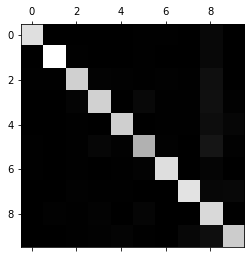

In [112]:
# Let's plot this using plt.matshow()
plt.matshow(confu_matrix, cmap=plt.cm.gray)
plt.show()

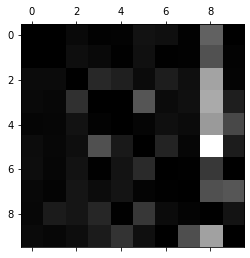

In [114]:
# Let's focus on the error only.
row_sum=confu_matrix.sum(axis=1,keepdims=True)
norm_confu_matrix=confu_matrix/row_sum
np.fill_diagonal(norm_confu_matrix,0)
plt.matshow(norm_confu_matrix,cmap=plt.cm.gray)
plt.show()

In [130]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

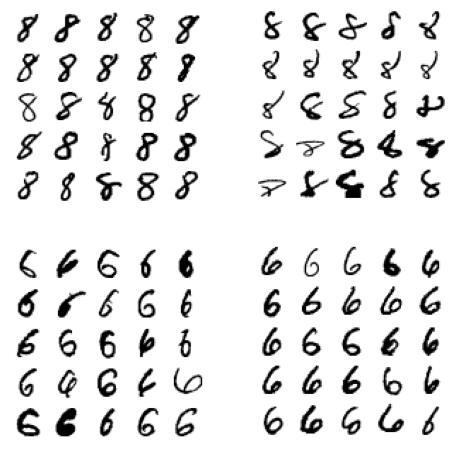

In [136]:
cl_a, cl_b =8, 6
X_aa = X_train[(y_train == cl_a) & (y_multi_scores == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_multi_scores == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_multi_scores == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_multi_scores == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221)
plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222)
plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223)
plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224) 
plot_digits(X_bb[:25], images_per_row=5)
plt.show()


**Multilabel Classification**

In [138]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
# The first digit in multilabel indicates whether it is large(7,8,9) or not.
# The second digit indicates whether it is odd or not


KNeighborsClassifier()

In [141]:
knn_clf.predict(some_digit)
# Right, # is not large(False) but it is odd(True)

array([[False,  True]])

In [142]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro") #average="weighted" if you want to give more weight to some label.

0.976410265560605

**Multioutput classification:-**

It is simply a generalization of multilabel classification where each label can be multiclass (i.e., it can have more than two possible values).

To illustrate this, let’s build a system that removes noise from images. It will take as input a noisy digit image, and it will (hopefully) output a clean digit image, represented as an array of pixel intensities, just like the MNIST images. Notice that the classifier’s output is multilabel (one label per pixel) and each label can have multiple values (pixel intensity ranges from 0 to 255). It is thus an example of a multioutput classification system.

In [144]:
noise=np.random.randint(0,100,(len(X_train),784))
X_train_moc=X_train+noise
noise=np.random.randint(0,100,(len(X_test),784))
X_test_moc=X_test+noise
y_train_mod=X_train
y_test_mod=X_test

In [146]:
knn_clf.fit(X_train_moc,y_train_mod)

KNeighborsClassifier()

c:\Users\bansa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


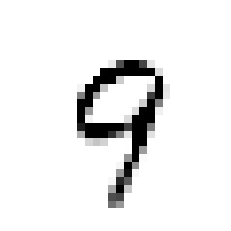

In [180]:
pred=knn_clf.predict([X_test_moc.iloc[12]])
plot_digits(pred)

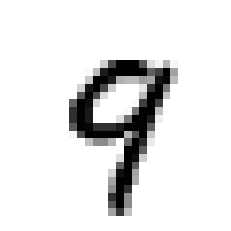

In [176]:
plot_digits([y_test_mod.iloc[12]])